# **Credit Card Fraud Detection**
---
                                                                 Name : VISHNU E
                                                                 Organization : CodSoft
                                                                 Date : 08/12/2024

## **Problem Statement**
---

To develop a machine learning model to detect fraudulent credit card transactions using techniques. It involves preprocessing data, addressing class imbalance, and evaluating performance with metrics such as precision, recall, and F1-score.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Exploratory Data Analysis

In [4]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# statistical summary of the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
# checking for null values

df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
# checking for duplicate values

df.duplicated().sum()

1081

In [8]:
# Show all duplicate rows, including the first occurrence
display_duplicate_rows = df[df.duplicated(keep=False)]

# Display all duplicates
print(display_duplicate_rows)

            Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [9]:
# removing duplicate rows

df_cleaned = df.drop_duplicates(keep = 'first')
df_cleaned

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
df_cleaned.duplicated().sum()

0

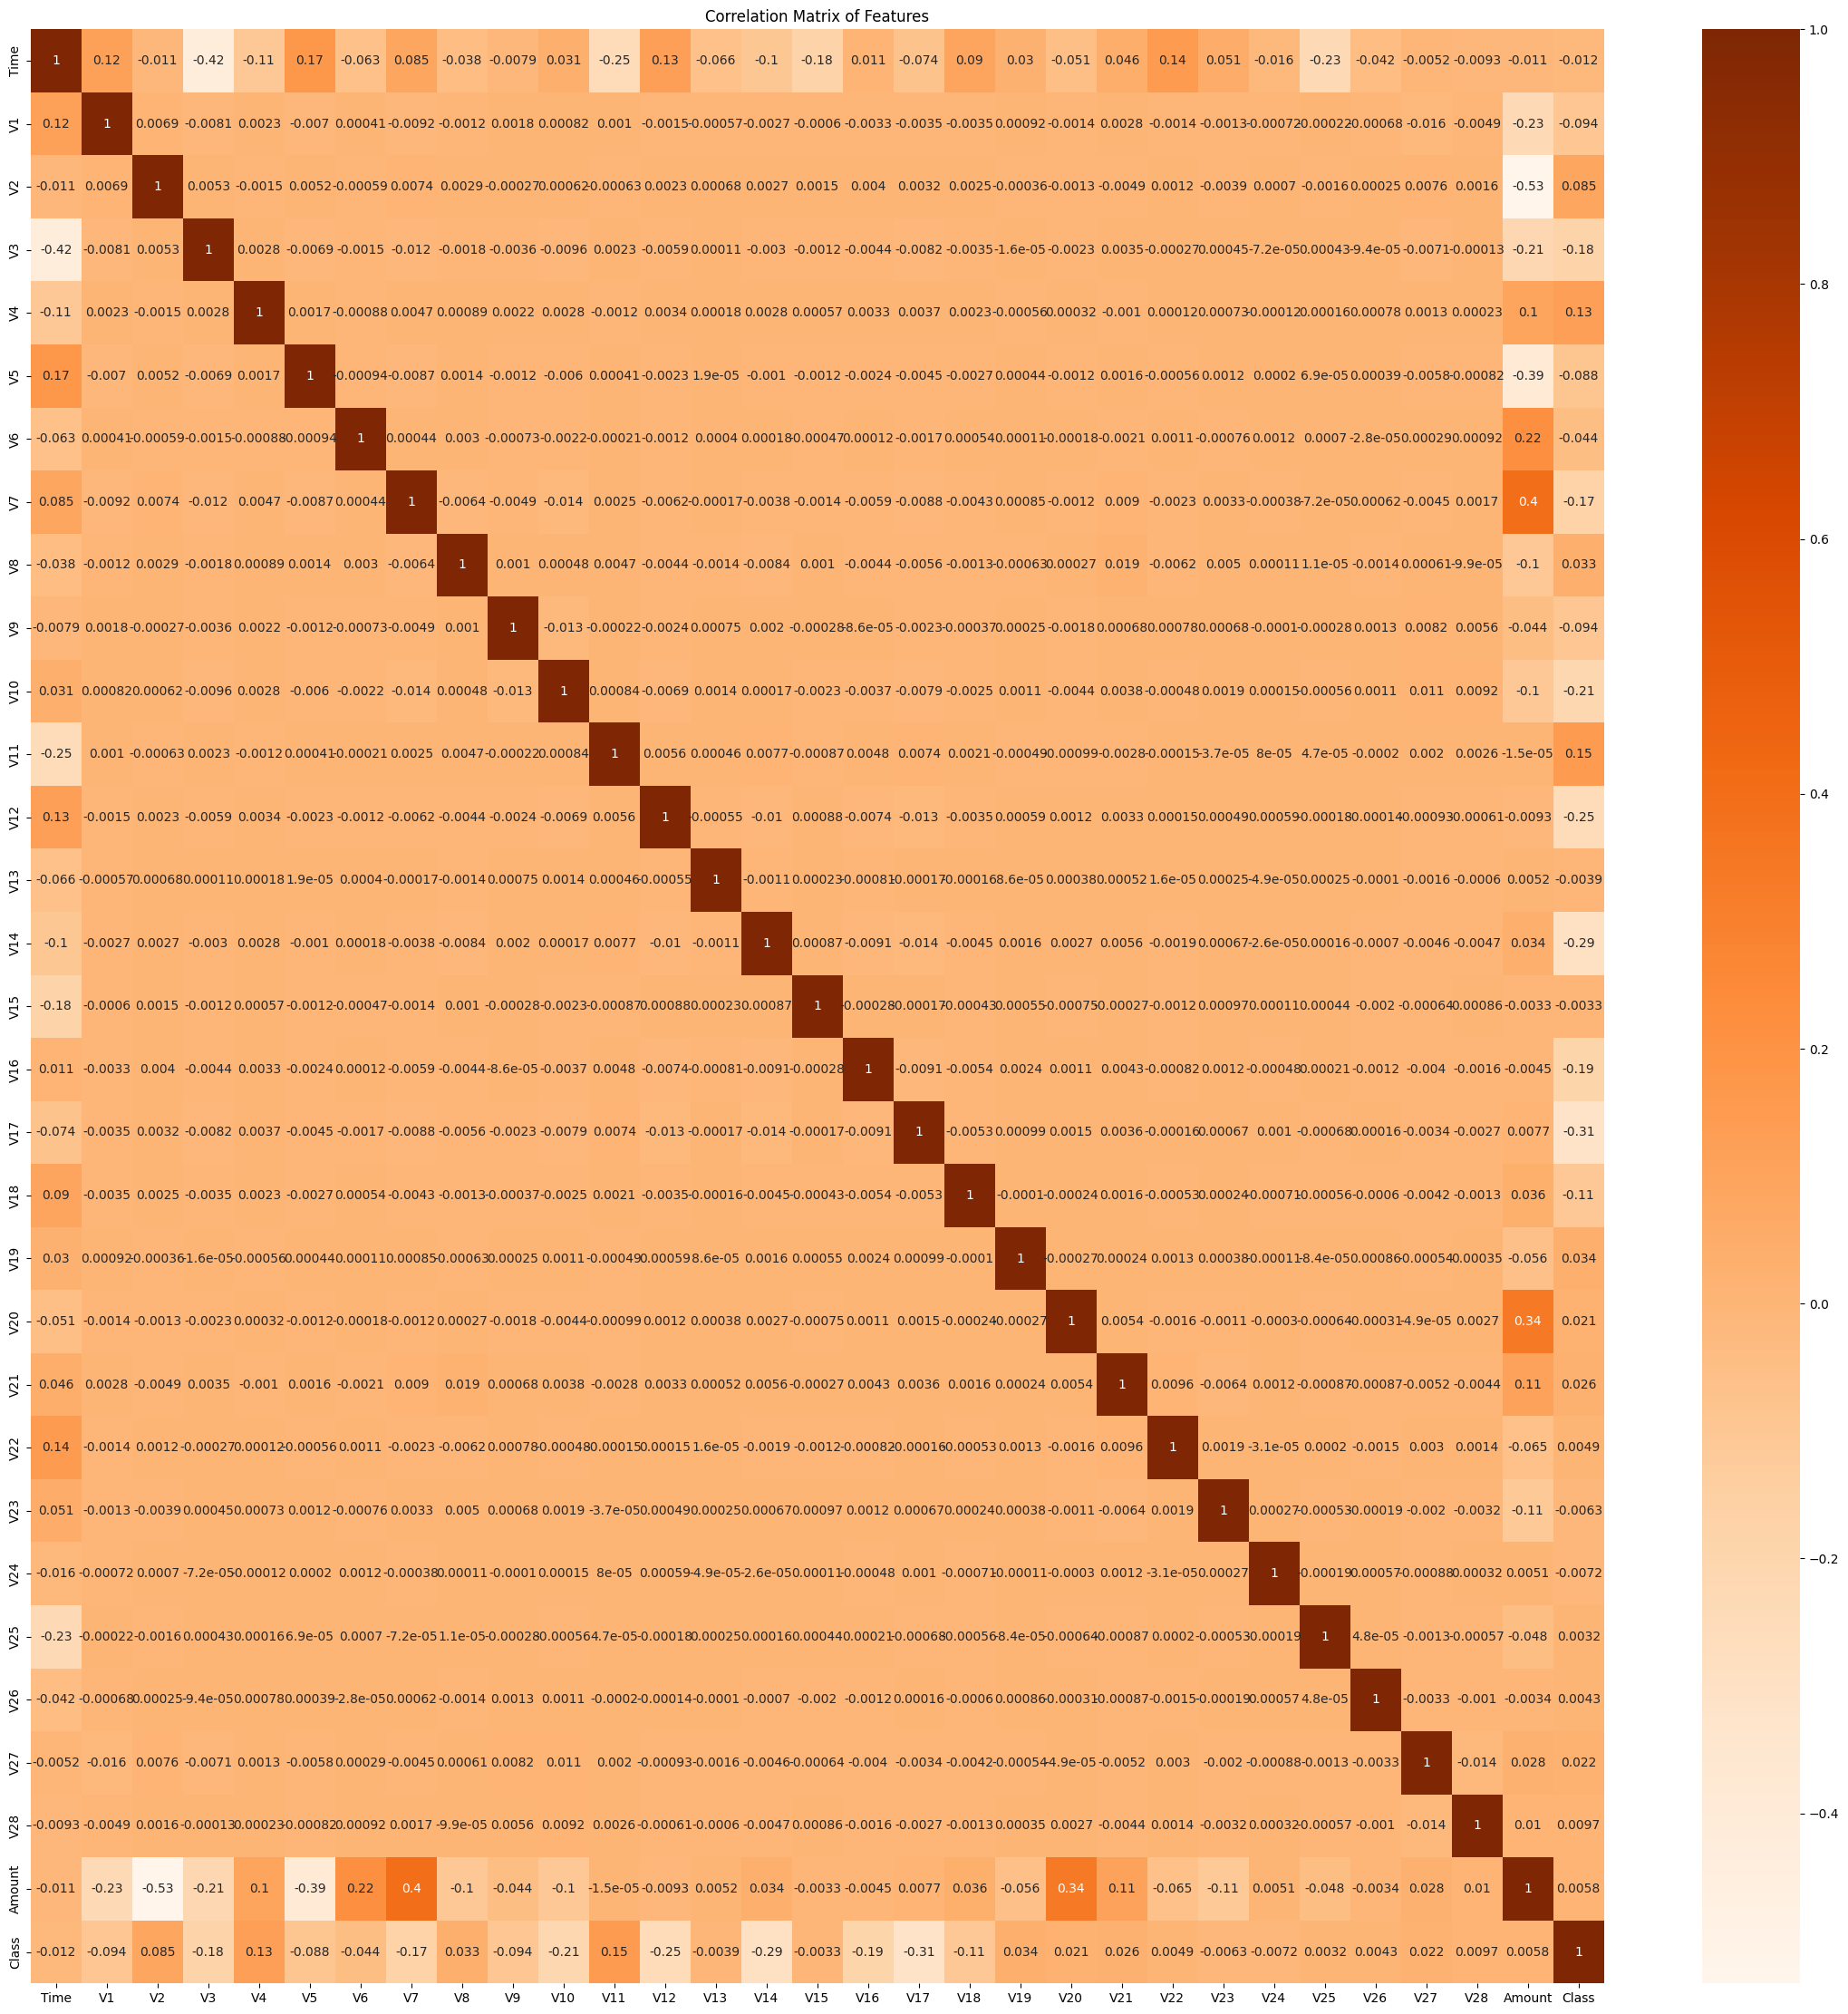

In [11]:
# correlation matrix of features
plt.figure(figsize = (28, 28))
sns.heatmap(df_cleaned.corr(numeric_only = True), annot = True, cmap = 'Oranges')
plt.title('Correlation Matrix of Features')
plt.show()

Class
0    283253
1       473
Name: count, dtype: int64


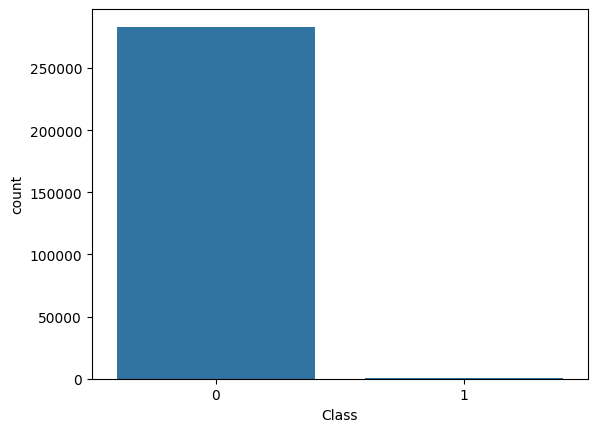

In [12]:
# Class type distribution

sns.countplot(x = 'Class', data = df_cleaned)
print(df_cleaned['Class'].value_counts())

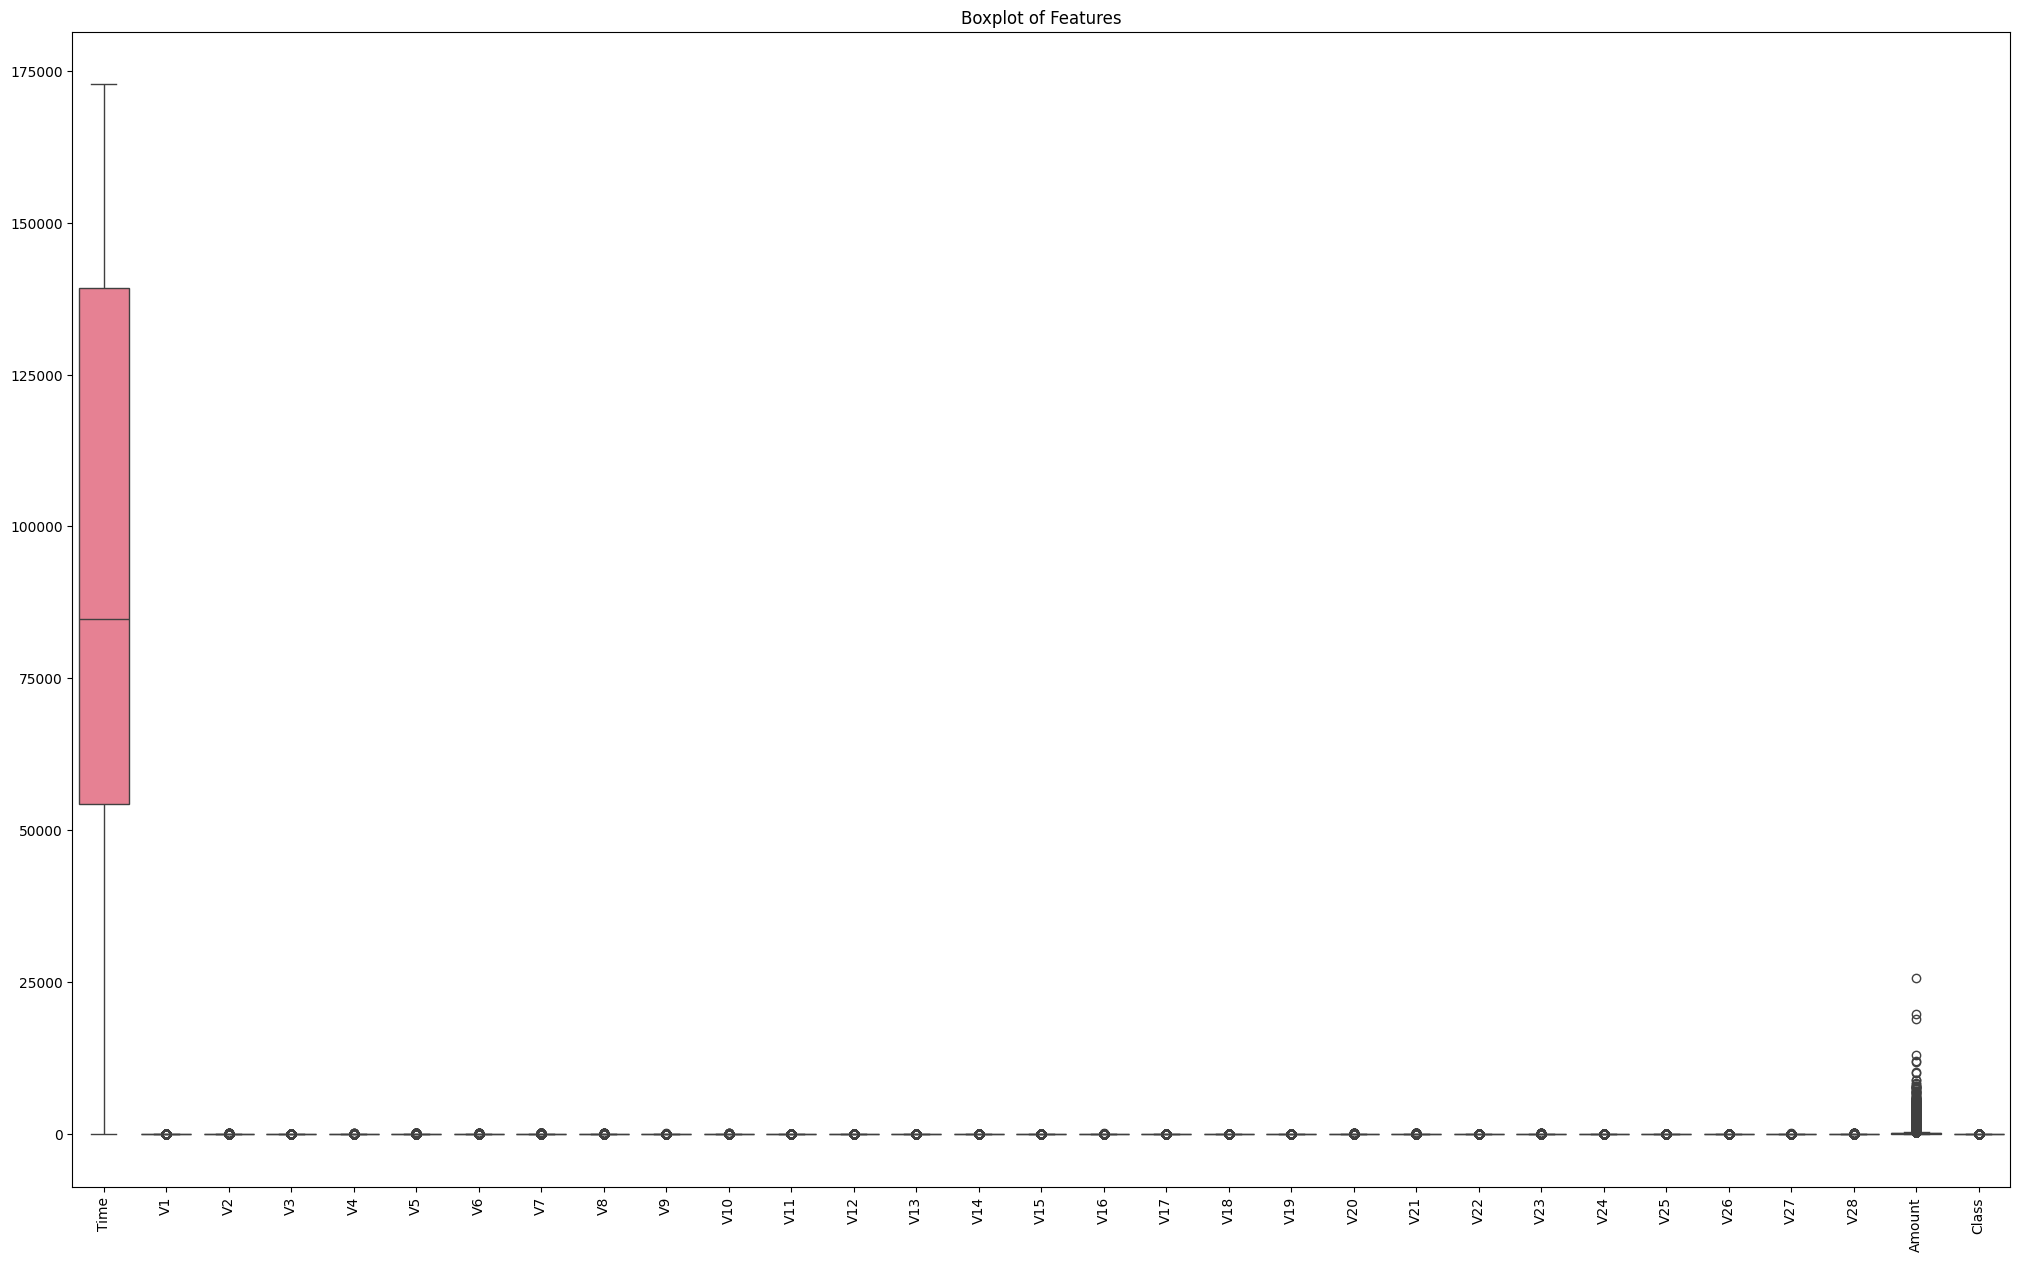

In [13]:
# Boxplot of features

plt.figure(figsize = (25,15))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
sns.boxplot(data = df_cleaned)
plt.show()

In [14]:
# checking for outliers

required_columns = df_cleaned.columns

for i in required_columns:

    q1 = df_cleaned[i].quantile(0.25)
    q3 = df_cleaned[i].quantile(0.75)
    iqr = q3 - q1

    lower_whisker_value = q1 - 1.5 * iqr
    upper_whisker_value = q3 + 1.5 * iqr

    outliers_iqr = (df_cleaned[i] < lower_whisker_value) | (df_cleaned[i] > upper_whisker_value)

# Print indices of outliers
    print(f'{i} - Outliers:', outliers_iqr.sum())

Time - Outliers: 0
V1 - Outliers: 6948
V2 - Outliers: 13390
V3 - Outliers: 3306
V4 - Outliers: 11094
V5 - Outliers: 12221
V6 - Outliers: 22886
V7 - Outliers: 8839
V8 - Outliers: 23904
V9 - Outliers: 8199
V10 - Outliers: 9345
V11 - Outliers: 735
V12 - Outliers: 15282
V13 - Outliers: 3362
V14 - Outliers: 14060
V15 - Outliers: 2884
V16 - Outliers: 8180
V17 - Outliers: 7353
V18 - Outliers: 7468
V19 - Outliers: 10150
V20 - Outliers: 27553
V21 - Outliers: 14401
V22 - Outliers: 1298
V23 - Outliers: 18467
V24 - Outliers: 4758
V25 - Outliers: 5333
V26 - Outliers: 5665
V27 - Outliers: 38799
V28 - Outliers: 30094
Amount - Outliers: 31685
Class - Outliers: 473


In [15]:
# checking zeros count

zeros_count = (df_cleaned == 0).sum()

# Display the count of 0's for each column
print("Count of 0's in Each Column:")
print(zeros_count)

Count of 0's in Each Column:
Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1808
Class     283253
dtype: int64


In [16]:
# removing outliers

# List of features to check for outliers
features_with_outliers = df_cleaned.drop(columns = 'Class')

# Identify outliers using the IQR method
conditions = []
for feature in features_with_outliers:
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    condition = (df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)
    conditions.append(condition)

# Combine conditions using logical AND
combined_condition = np.logical_and.reduce(conditions)
df_new = df_cleaned[combined_condition]

In [17]:
# checking 'Class' distribution

df_new['Class'].value_counts()

,count
Class,
0,145938
1,15


In [18]:
# scaling features

from sklearn.preprocessing import StandardScaler,MinMaxScaler

X = df_new.drop(columns='Class')
y = df_new['Class']


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [19]:
# balancing the target value distribution

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_scaled, y= smote.fit_resample(X_scaled, y)
y.value_counts()

,count
Class,
0,145938
1,145938


In [20]:
# model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report



X_val = X_scaled
Y_val = y

X_train, X_test, y_train, y_test = train_test_split(X_val,Y_val, test_size = 0.2, random_state = 42)

results = []

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_metrics = {
    'Model': 'Logistic Regression',
    'Test Accuracy': accuracy_score(y_test, lr_pred),
    'Train Accuracy': accuracy_score(y_train, lr_model.predict(X_train)),
    'Precision': precision_score(y_test, lr_pred),
    'Recall': recall_score(y_test, lr_pred),
    'F1 score': f1_score(y_test, lr_pred),
    'Train confusion matrix': confusion_matrix(y_train, lr_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, lr_pred)

}
results.append(lr_metrics)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Test Accuracy': accuracy_score(y_test, rf_pred),
    'Train Accuracy': accuracy_score(y_train, rf_model.predict(X_train)),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1 score': f1_score(y_test, rf_pred),
    'Train confusion matrix': confusion_matrix(y_train, rf_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, rf_pred)

}
results.append(rf_metrics)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_metrics = {
    'Model': 'Decision Tree',
    'Test Accuracy': accuracy_score(y_test, dt_pred),
    'Train Accuracy': accuracy_score(y_train, dt_model.predict(X_train)),
    'Precision': precision_score(y_test, dt_pred),
    'Recall': recall_score(y_test, dt_pred),
    'F1 score': f1_score(y_test, dt_pred),
    'Train confusion matrix': confusion_matrix(y_train, dt_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, dt_pred)
}
results.append(dt_metrics)

#  KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_metrics = {
    'Model': 'KNN Classifier',
    'Test Accuracy': accuracy_score(y_test, knn_pred),
    'Train Accuracy': accuracy_score(y_train, knn_model.predict(X_train)),
    'Precision': precision_score(y_test, knn_pred),
    'Recall': recall_score(y_test, knn_pred),
    'F1 score': f1_score(y_test, knn_pred),
    'Train confusion matrix': confusion_matrix(y_train, knn_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, knn_pred)
}
results.append(knn_metrics)

# Ada Boost
ad_model = AdaBoostClassifier()
ad_model.fit(X_train, y_train)
ad_pred = ad_model.predict(X_test)
ad_metrics = {
    'Model': 'Ada boost classifier',
    'Test Accuracy': accuracy_score(y_test, ad_pred),
    'Train Accuracy': accuracy_score(y_train, ad_model.predict(X_train)),
    'Precision': precision_score(y_test, ad_pred),
    'Recall': recall_score(y_test, ad_pred),
    'F1 score': f1_score(y_test, ad_pred),
    'Train confusion matrix': confusion_matrix(y_train, ad_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, ad_pred)
}
results.append(ad_metrics)


# Create DataFrame for results
results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Test Accuracy,Train Accuracy,Precision,Recall,F1 score,Train confusion matrix,Test confusion matrix
0,Logistic Regression,0.966202,0.967482,0.937015,1.000000,0.967484,"[[109321, 7593], [0, 116586]]","[[27051, 1973], [0, 29352]]"
1,Random Forest,0.999983,1.000000,0.999966,1.000000,0.999983,"[[116914, 0], [0, 116586]]","[[29023, 1], [0, 29352]]"
2,Decision Tree,0.999692,1.000000,0.999421,0.999966,0.999693,"[[116914, 0], [0, 116586]]","[[29007, 17], [1, 29351]]"
3,KNN Classifier,0.999572,0.999739,0.999149,1.000000,0.999574,"[[116853, 61], [0, 116586]]","[[28999, 25], [0, 29352]]"
4,Ada boost classifier,0.993559,0.994201,0.987582,0.999762,0.993634,"[[115569, 1345], [9, 116577]]","[[28655, 369], [7, 29345]]"
